In [22]:
import pandas as pd
import seaborn as sns; sns.set(style="darkgrid")
import numpy as np

raw_edu = pd.read_csv('Education/education_data_2019.csv')
raw_inco = pd.read_csv('Income/income_data_2019.csv')
raw_popul_20 = pd.read_csv('Population/population_2020.csv', encoding='iso-8859-1')
raw_covid_20 = pd.read_csv('COVID-19/USA_COVID-19_2020.csv', encoding='iso-8859-1')
raw_covid_21 = pd.read_csv('COVID-19/USA_COVID-19_2021.csv', encoding='iso-8859-1')

In [11]:
merged = pd.DataFrame()
popul = pd.DataFrame()
ratio = pd.DataFrame()
household = pd.DataFrame()
covid19_20 = pd.DataFrame()
covid19_21 = pd.DataFrame()

popul['State'] = raw_edu['State']
popul['Population'] = raw_edu['Population_total']
popul = popul.groupby(['State']).sum()
popul = popul.reset_index()

ratio['State'] = raw_edu['State']
ratio['Ratio'] = raw_edu['Ratio']
ratio = ratio.groupby(['State']).mean()
ratio = ratio.reset_index()

household['State'] = raw_inco['State']
household['Household'] = raw_inco['Households_total']
household = household.groupby(['State']).mean()
household = household.reset_index()

popul_20 = raw_popul_20.groupby(['State']).sum()
popul_20 = popul_20.reset_index()
states_ls = popul['State'].tolist()

filt20 = raw_covid_20[raw_covid_20['date'] == '12/31/2020']
covid19_20['State'] = filt20['State']
covid19_20['deaths'] = filt20['deaths']
covid19_20 = covid19_20.groupby(['State']).sum()
covid19_20 = covid19_20.reset_index()
covid19_20 = covid19_20[covid19_20['State'].isin(states_ls)]
covid19_20 = covid19_20.reset_index(drop=True)

filt21 = raw_covid_21[raw_covid_21['date'] == '2021-12-31']
covid19_21['State'] = filt21['State']
covid19_21['deaths'] = filt21['deaths']
covid19_21 = covid19_21.groupby(['State']).sum()
covid19_21 = covid19_21.reset_index()
covid19_21 = covid19_21[covid19_21['State'].isin(states_ls)]
covid19_21 = covid19_21.reset_index(drop=True)

merged['State'] = popul['State']
merged['Population'] = popul['Population']
ratio = ratio['Ratio']
household = household['Household']
merged['Ratio'] = ratio
merged['Household'] = household
merged['Interaction'] = (ratio/ratio.max())*(household/household.max())
merged['Deaths_rate_2020'] = 1E5*covid19_20['deaths']/popul_20['Estimate']
merged['Deaths_rate_2021'] = 1E5*covid19_21['deaths']/popul_20['Estimate']

merged = merged.sort_values(by=['Population'], ascending=False)
merged = merged.reset_index(drop=True)

In [12]:
merged

,State,Population,Ratio,Household,Interaction,Deaths_rate_2020,Deaths_rate_2021
0,California,39512223,0.188448,316777.243902,0.289839,65.991422,194.959984
1,Texas,28995881,0.125906,162044.203704,0.099058,98.322212,265.621882
2,Florida,21477737,0.158358,187187.463415,0.143922,102.144873,294.595013
3,New York,19453561,0.198710,180662.076923,0.174300,192.453449,302.298009
4,Pennsylvania,12801989,0.166866,118209.300000,0.095770,125.206284,286.872449
5,Illinois,12671821,0.149902,180059.652174,0.131049,141.386978,243.917899
6,Ohio,11689100,0.140000,102472.743590,0.069654,76.760505,252.216757
7,Georgia,10617423,0.124340,79670.567568,0.048097,100.679128,287.954857
8,North Carolina,10488084,0.153400,80172.731707,0.059712,65.577230,187.132440
9,Michigan,9986857,0.157831,116089.517241,0.088960,130.440358,290.598258


<AxesSubplot:xlabel='Household', ylabel='Deaths_rate_2021'>

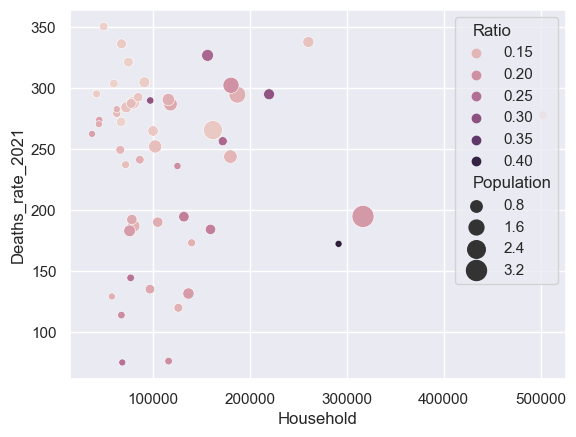

In [24]:
#sns.scatterplot(merged, x="Ratio", y="Household") #, hue="State", style="State")

#sns.scatterplot(merged, x="Household", y="Deaths_rate_2021")

sns.scatterplot(merged, x="Household", y="Deaths_rate_2021",
                hue="Ratio", size="Population", sizes=(25, 250))

#sns.scatterplot(merged, x="Ratio", y="Deaths_rate_2021")